In [1]:
from vietocr.tool.config import Cfg
from vietocr.tool.predictor import Predictor

# Load cấu hình model
config = Cfg.load_config_from_name('vgg_transformer')

# Dùng CPU thay vì GPU
config['device'] = 'cpu'

# Đường dẫn weights (có thể bỏ nếu muốn tự tải về)
# config['weights'] = 'weights/vietocr-vgg-transformer.pth'

# Tạo model predictor
detector = Predictor(config)


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\ADMIN\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


In [2]:
from PIL import Image

image = Image.open('C:/Users/ADMIN/Documents/data_line/data-line/data-line/data/1720.jpg')
text = detector.predict(image)
print('Kết quả nhận diện:', text)


Kết quả nhận diện: Bí Thư Tô Lâm đặt


In [3]:
import cv2
from PIL import Image
import numpy as np
from vietocr.tool.config import Cfg
from vietocr.tool.predictor import Predictor

# Đọc ảnh gốc
image = cv2.imread('C:/Users/ADMIN/Documents/data_line/data-line/data-line/data/1709.jpg')

# Chuyển sang grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Làm mịn + tăng tương phản
blur = cv2.GaussianBlur(gray, (3, 3), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Chuyển ảnh sang định dạng PIL trực tiếp
img = Image.fromarray(thresh)

# Đưa vào VietOCR
config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cpu'
detector = Predictor(config)

result = detector.predict(img)
print("Kết quả nhận diện:", result)


Model weight C:\Users\ADMIN\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!
Kết quả nhận diện: lượng hải quân Trung Quốc


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\ADMIN\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


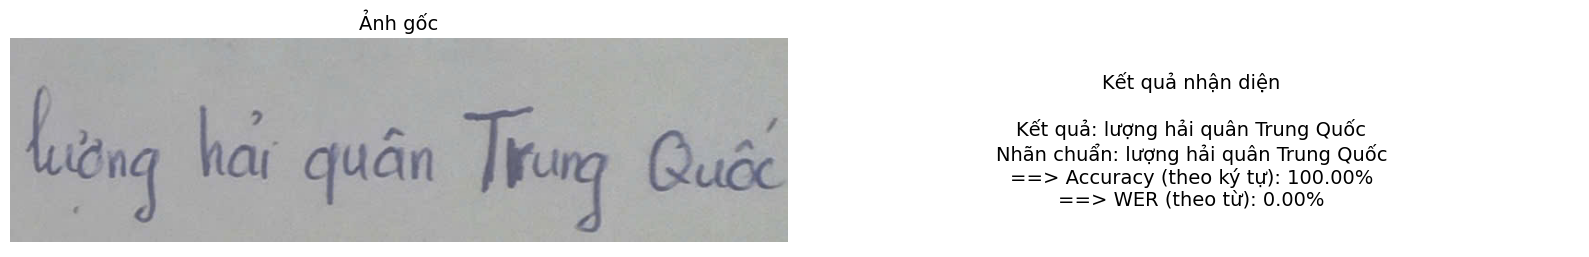

In [ ]:
import cv2
from PIL import Image
import numpy as np
from vietocr.tool.config import Cfg
from vietocr.tool.predictor import Predictor
import matplotlib.pyplot as plt
import editdistance

# Hàm tính WER
def wer(reference, hypothesis):
    ref_words = reference.strip().split()
    hyp_words = hypothesis.strip().split()
    distance = editdistance.eval(ref_words, hyp_words)
    return distance / max(len(ref_words), 1)

# Hàm tính Accuracy theo ký tự
def cer_accuracy(reference, hypothesis):
    ref_chars = list(reference.strip())
    hyp_chars = list(hypothesis.strip())
    distance = editdistance.eval(ref_chars, hyp_chars)
    accuracy = (1 - distance / max(len(ref_chars), 1)) * 100
    return accuracy

# Đọc nhãn từ file label.txt
def load_labels(label_path):
    labels = {}
    with open(label_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                path, text = parts
                filename = path.split('/')[-1]
                labels[filename] = text
    return labels

# --- Phần chính ---

# Đọc ảnh gốc
image_path = 'C:/Users/ADMIN/Documents/data_line/data-line/data-line/data/1709.jpg'
image = cv2.imread(image_path)

# Chuyển sang grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Làm mịn + tăng tương phản
blur = cv2.GaussianBlur(gray, (3, 3), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Chuyển ảnh sang định dạng PIL
img = Image.fromarray(thresh)

# Load model VietOCR
config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cpu'
detector = Predictor(config)

# Nhận diện
result = detector.predict(img)

# Load nhãn chuẩn
labels = load_labels('C:/Users/ADMIN/Documents/data_line/data-line/data-line/label.txt')

# Lấy tên file
file_name = image_path.split('/')[-1]

# So sánh với nhãn thật
if file_name in labels:
    ground_truth = labels[file_name]
    acc = cer_accuracy(ground_truth, result)
    error_rate = wer(ground_truth, result)

    text_result = f"Kết quả nhận diện\n" \
                  f"Kết quả: {result}\n" \
                  f"Nhãn chuẩn: {ground_truth}\n" \
                  f"==> Accuracy (theo ký tự): {acc:.2f}%\n" \
                  f"==> WER (theo từ): {error_rate * 100:.2f}%"
else:
    text_result = "Kết quả nhận diện\n\nKhông tìm thấy nhãn cho ảnh."

# Vẽ ra màn hình: 1 hàng 2 cột
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 2.5))

# Bên trái: ảnh
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax1.set_title('Ảnh gốc', fontsize=14)

# Bên phải: text căn giữa
ax2.axis('off')
ax2.text(0.5, 0.5, text_result, fontsize=14, ha='center', va='center', wrap=True)

plt.tight_layout()
plt.show()


Model weight C:\Users\ADMIN\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


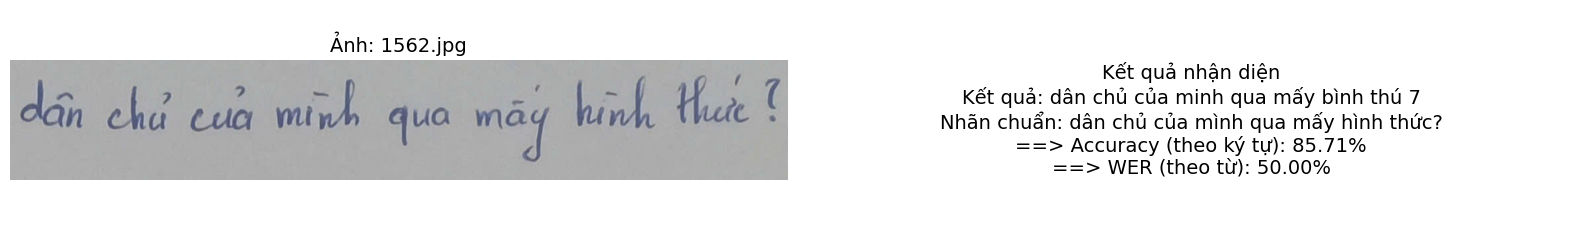

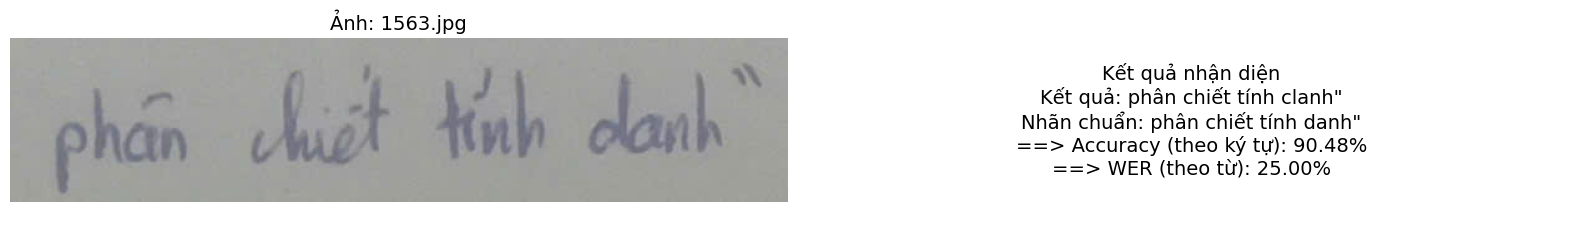

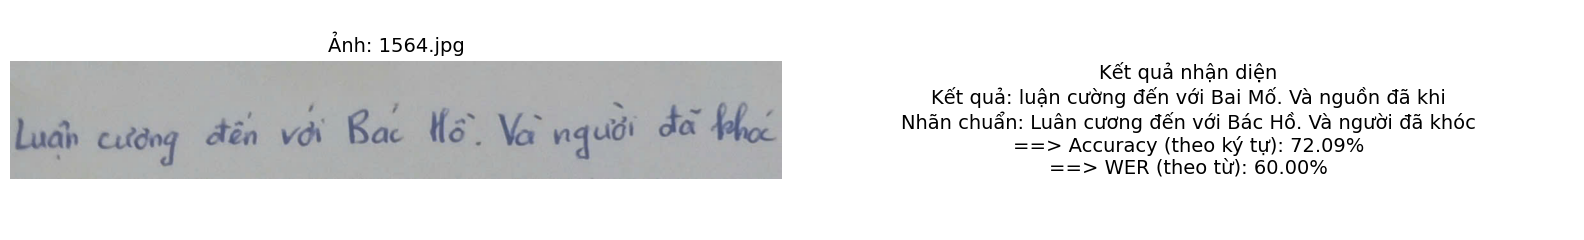

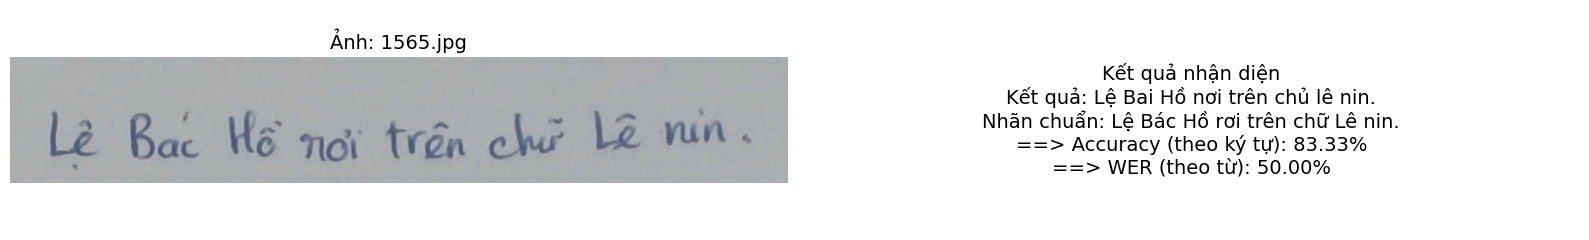

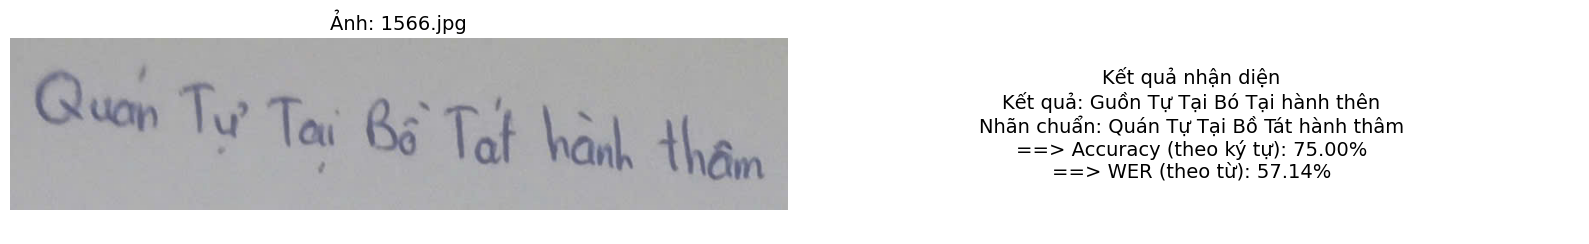

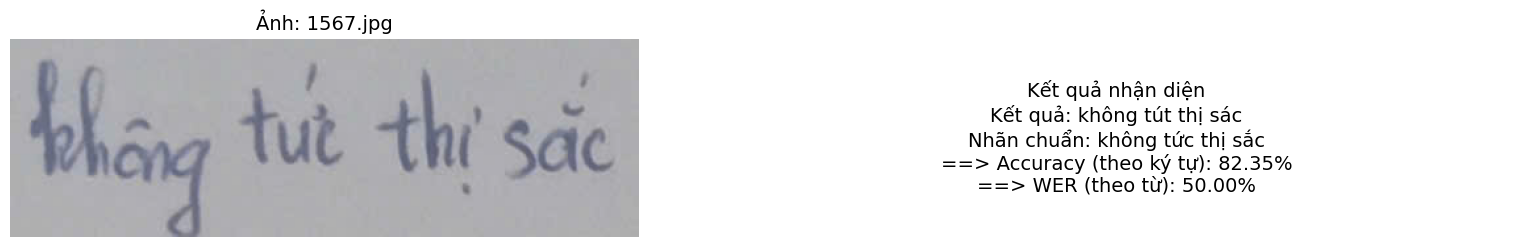

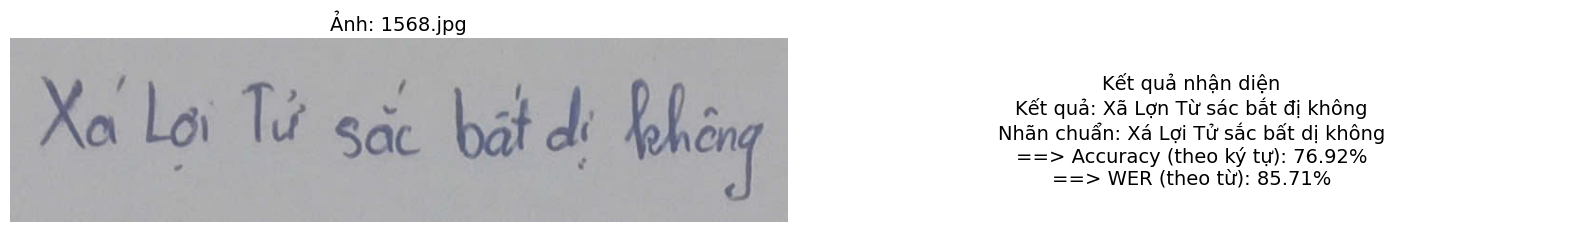

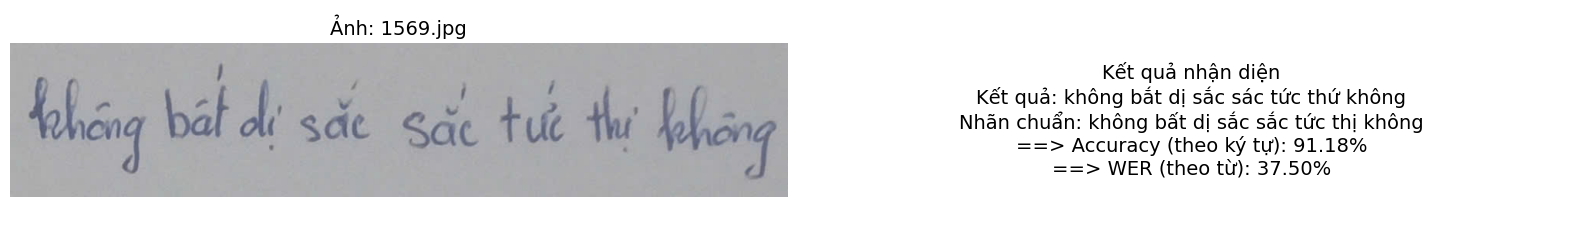

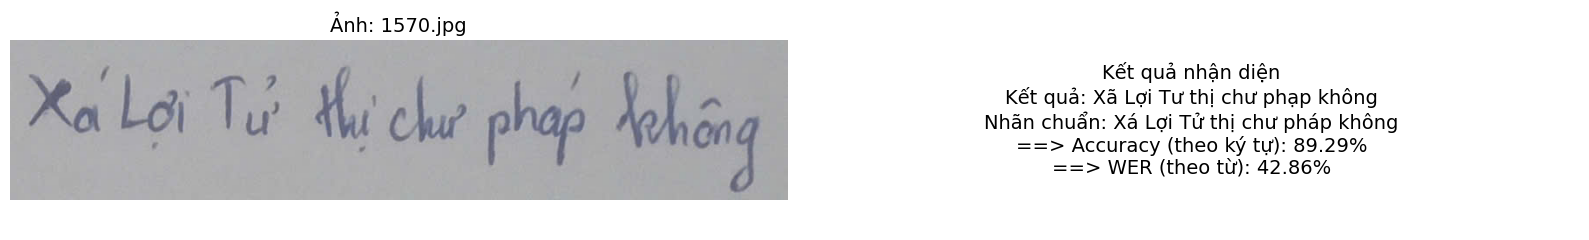

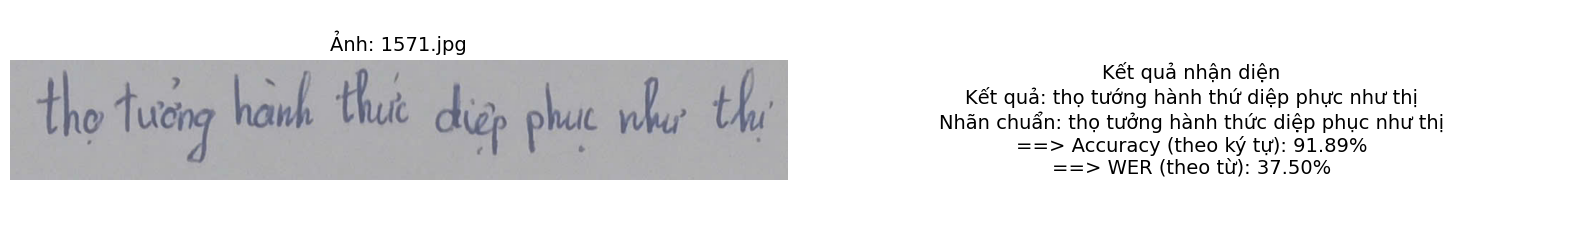

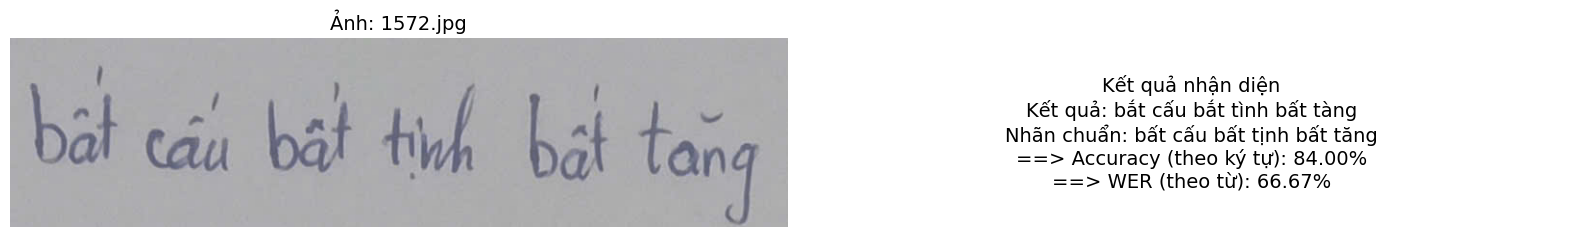

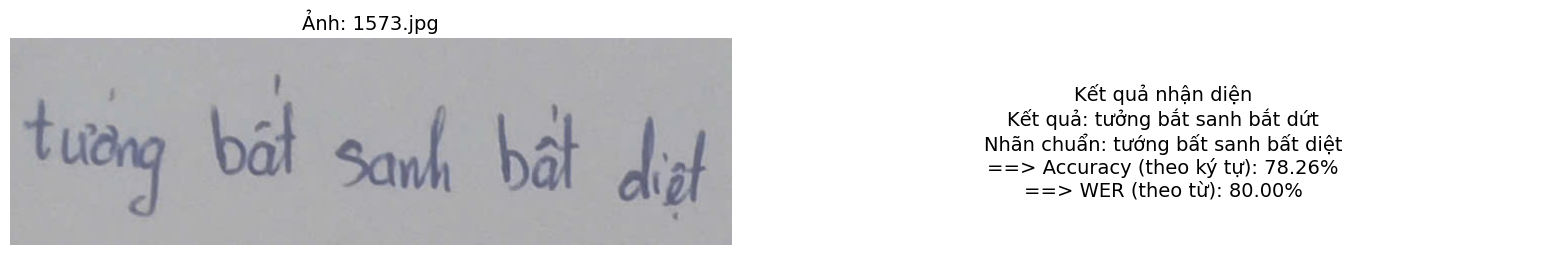

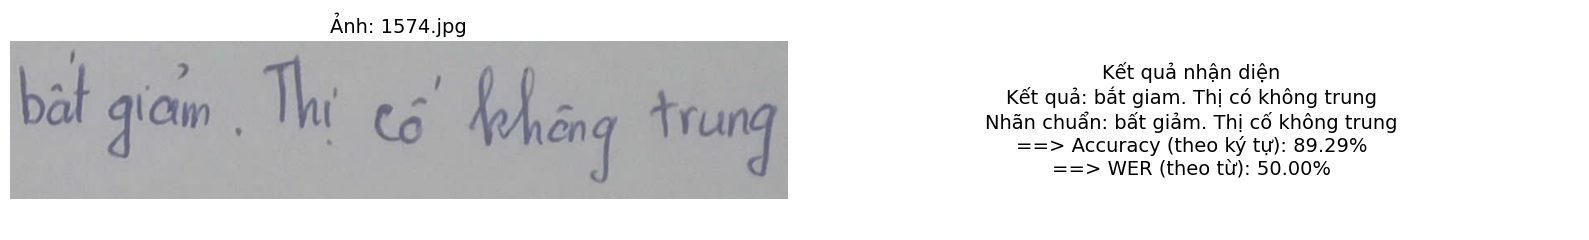

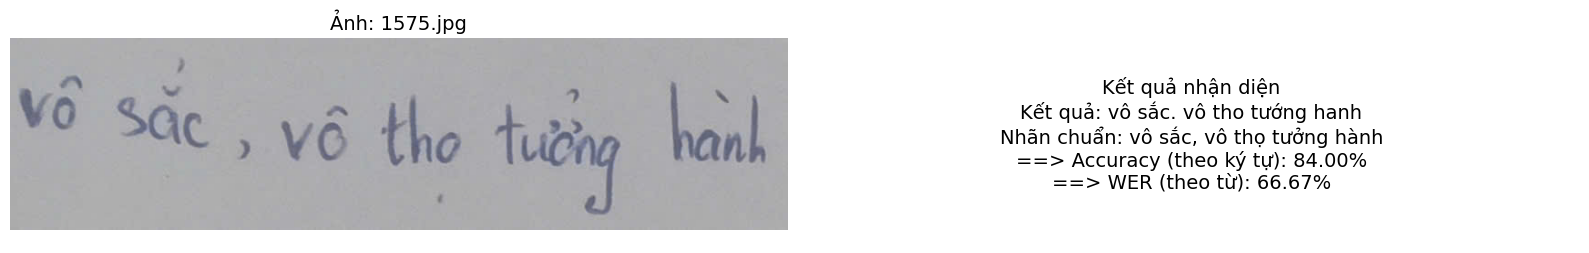

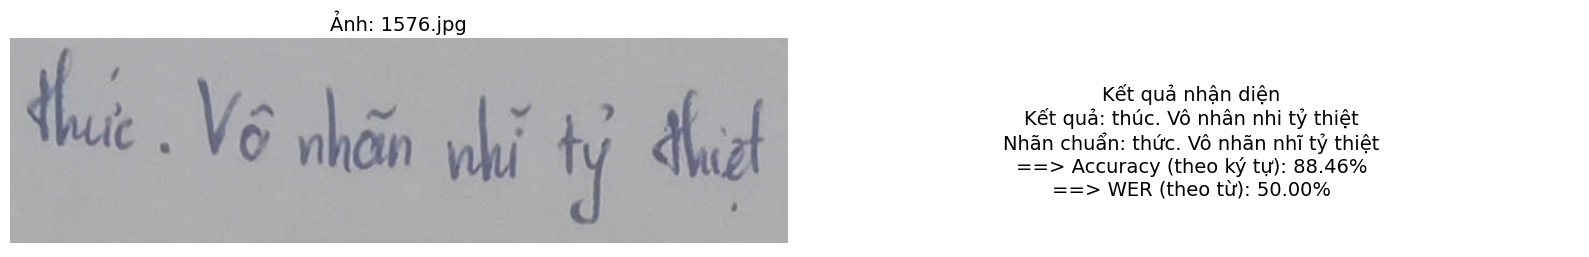

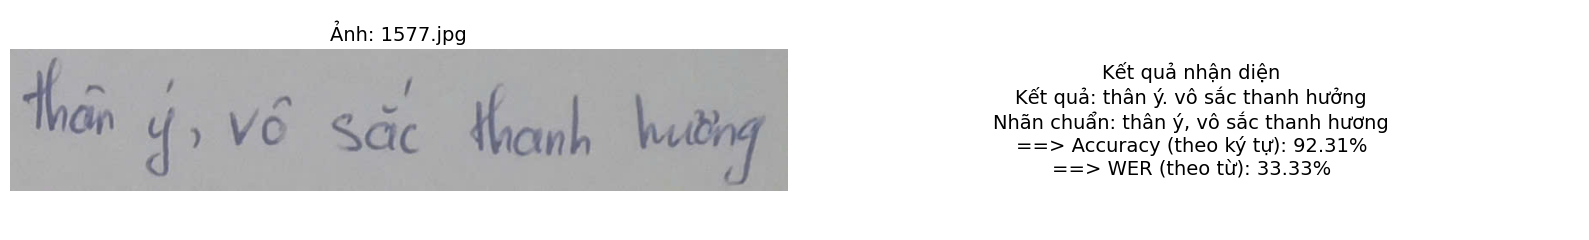

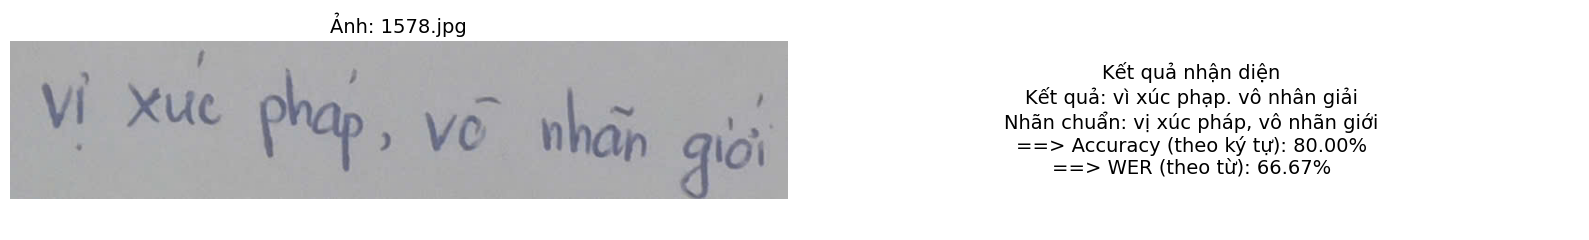

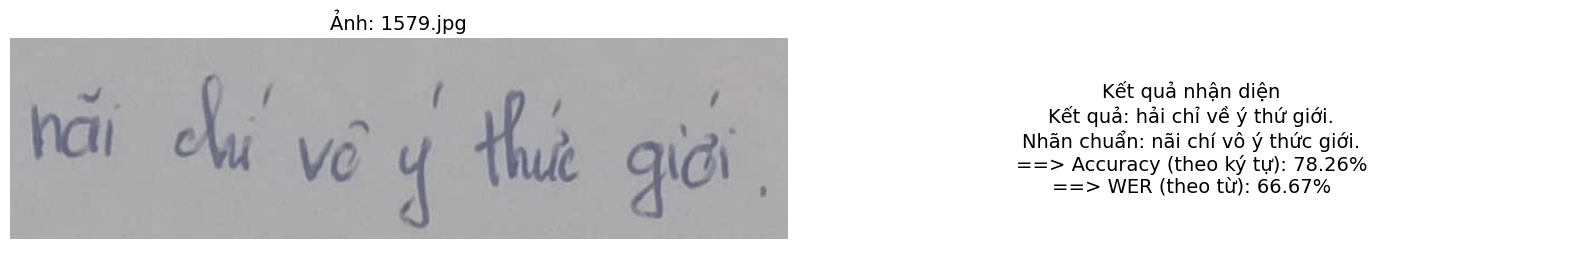

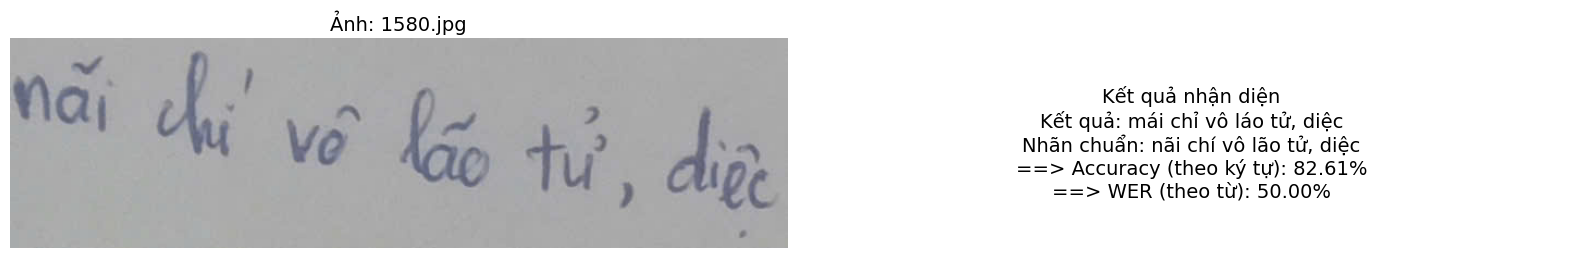

In [3]:
import os
import cv2
from PIL import Image
import numpy as np
from vietocr.tool.config import Cfg
from vietocr.tool.predictor import Predictor
import matplotlib.pyplot as plt
import editdistance

# Hàm tính WER
def wer(reference, hypothesis):
    ref_words = reference.strip().split()
    hyp_words = hypothesis.strip().split()
    distance = editdistance.eval(ref_words, hyp_words)
    return distance / max(len(ref_words), 1)

# Hàm tính Accuracy theo ký tự
def cer_accuracy(reference, hypothesis):
    ref_chars = list(reference.strip())
    hyp_chars = list(hypothesis.strip())
    distance = editdistance.eval(ref_chars, hyp_chars)
    accuracy = (1 - distance / max(len(ref_chars), 1)) * 100
    return accuracy

# Đọc nhãn từ file label.txt
def load_labels(label_path):
    labels = {}
    with open(label_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                path, text = parts
                filename = path.split('/')[-1]
                labels[filename] = text
    return labels

# --- Phần chính ---

image_folder = 'C:/Users/ADMIN/Documents/data_line/test/image'
label_path = 'C:/Users/ADMIN/Documents/data_line/test/label.txt'

# Load nhãn chuẩn
labels = load_labels(label_path)

# Load model VietOCR
config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cpu'
detector = Predictor(config)

for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)

        # Tiền xử lý
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (3, 3), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        img = Image.fromarray(thresh)

        # Dự đoán
        result = detector.predict(img)

        # So sánh và hiển thị nếu có nhãn
        if filename in labels:
            ground_truth = labels[filename]
            acc = cer_accuracy(ground_truth, result)
            error_rate = wer(ground_truth, result)

            # Hiển thị bằng matplotlib
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 2.5))
            ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            ax1.axis('off')
            ax1.set_title(f'Ảnh: {filename}', fontsize=14)
            ax2.axis('off')
            text_result = f"Kết quả nhận diện\n" \
                          f"Kết quả: {result}\n" \
                          f"Nhãn chuẩn: {ground_truth}\n" \
                          f"==> Accuracy (theo ký tự): {acc:.2f}%\n" \
                          f"==> WER (theo từ): {error_rate * 100:.2f}%"
            ax2.text(0.5, 0.5, text_result, fontsize=14, ha='center', va='center', wrap=True)
            plt.tight_layout()
            plt.show()


In [ ]:
# Ứng dụng Tkinter đơn trang cho VietOCR
import os
import cv2
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from vietocr.tool.config import Cfg
from vietocr.tool.predictor import Predictor
import editdistance

# Hàm đánh giá
def wer(reference, hypothesis):
    ref_words = reference.strip().split()
    hyp_words = hypothesis.strip().split()
    distance = editdistance.eval(ref_words, hyp_words)
    return distance / max(len(ref_words), 1)

def cer_accuracy(reference, hypothesis):
    ref_chars = list(reference.strip())
    hyp_chars = list(hypothesis.strip())
    distance = editdistance.eval(ref_chars, hyp_chars)
    accuracy = (1 - distance / max(len(ref_chars), 1)) * 100
    return accuracy

def load_labels(label_path):
    labels = {}
    with open(label_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                path, text = parts
                filename = os.path.basename(path)
                labels[filename] = text
    return labels

# Khởi tạo model
config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cpu'
detector = Predictor(config)

# Giao diện Tkinter
root = tk.Tk()
root.title("Ứng dụng VietOCR - Giao diện đơn trang")

# Biến lưu đường dẫn và dữ liệu
image_list = []
labels = {}
current_index = 0

def browse_folder():
    global image_list, labels, current_index
    folder = filedialog.askdirectory()
    entry_folder.delete(0, tk.END)
    entry_folder.insert(0, folder)

    label_path = filedialog.askopenfilename(title="Chọn file label.txt", filetypes=[("Text files", "*.txt")])
    entry_label.delete(0, tk.END)
    entry_label.insert(0, label_path)

    if folder and label_path:
        image_list = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        labels = load_labels(label_path)
        current_index = 0
        if image_list:
            display_image(folder, image_list[current_index])

def display_image(folder, filename):
    image_path = os.path.join(folder, filename)
    image = cv2.imread(image_path)

    # Xử lý ảnh
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img_pil = Image.fromarray(thresh)

    # Dự đoán
    result = detector.predict(img_pil)
    ground_truth = labels.get(filename, "Không có nhãn")
    acc = cer_accuracy(ground_truth, result) if ground_truth != "Không có nhãn" else 0
    wer_val = wer(ground_truth, result) if ground_truth != "Không có nhãn" else 0

    # Hiển thị ảnh
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)
    img_pil.thumbnail((500, 500))
    img_tk = ImageTk.PhotoImage(img_pil)
    panel_img.config(image=img_tk)
    panel_img.image = img_tk

    # Hiển thị kết quả
    result_text.set(f"Kết quả: {result}\nNhãn: {ground_truth}\nAccuracy: {acc:.2f}%\nWER: {wer_val * 100:.2f}%")

def next_image():
    global current_index
    if image_list:
        current_index = (current_index + 1) % len(image_list)
        display_image(entry_folder.get(), image_list[current_index])

def prev_image():
    global current_index
    if image_list:
        current_index = (current_index - 1) % len(image_list)
        display_image(entry_folder.get(), image_list[current_index])

# Giao diện
frame_top = tk.Frame(root)
frame_top.pack(pady=10)

tk.Label(frame_top, text="Thư mục ảnh:").grid(row=0, column=0)
entry_folder = tk.Entry(frame_top, width=50)
entry_folder.grid(row=0, column=1)

tk.Label(frame_top, text="File label.txt:").grid(row=1, column=0)
entry_label = tk.Entry(frame_top, width=50)
entry_label.grid(row=1, column=1)

tk.Button(frame_top, text="Chọn thư mục và label", command=browse_folder).grid(row=0, column=2, rowspan=2, padx=10)

panel_img = tk.Label(root)
panel_img.pack(pady=10)

result_text = tk.StringVar()
tk.Label(root, textvariable=result_text, font=("Arial", 12), justify="left").pack()

frame_nav = tk.Frame(root)
frame_nav.pack(pady=10)
tk.Button(frame_nav, text="<< Ảnh trước", command=prev_image).pack(side="left", padx=10)
tk.Button(frame_nav, text="Ảnh tiếp >>", command=next_image).pack(side="right", padx=10)

root.mainloop()

